# Lab Assignment One: Exploring Table Data
**Wen Yang (47781972), Ziling Feng (47781816), Zheqi Wang (47711564), Beichen Hu (47809766)**

## 1. Business Understanding
### 1.1 Overview of the Dataset
This data set contains the daily weather conditions for Sydney, Australia during 2008-2017. And the data set includes weather information such as cloud volume, air humidity, wind direction, and wind speed. The forecasting task is to predict whether it will rain tomorrow based on existing information.<br />

The target variables RainTomorrow and RISK_MM means:<br />
1.It will rain tomorrow or not.<br />
2.The amount of rainfall tomorrow.<br />
#### Data Resource
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data. <br />
#### Variables Understanding
The dataset has 3337 instances and 22 features, below is the feature meanings:
- Date: The date of observation<br /> 
- Location: The common name of the location of the weather station<br /> 
- MinTemp: The minimum temperature in degrees celsius<br /> 
- MaxTemp: The maximum temperature in degrees celsius<br /> 
- Rainfall: The amount of rainfall recorded for the day in mm<br /> 
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br /> 
- Sunshine: The number of hours of bright sunshine in the day.<br /> 
- WindDir9am: Direction of the wind at 9am<br /> 
- WindDir3pm: Direction of the wind at 3pm<br /> 
- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am<br /> 
- WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br /> 
- Humidity9am: Humidity (percent) at 9am<br /> 
- Humidity3pm: Humidity (percent) at 3pm<br /> 
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am<br /> 
- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br /> 
- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.<br /> 
- Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br /> 
- Temp9am: Temperature (degrees C) at 9am<br /> 
- Temp3pm: Temperature (degrees C) at 3pm<br /> 
- RainToday:Boolean, 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br /> 
- RISK_MM: The amount of rain. A kind of measure of the "risk".<br /> 
- RainTomorrow: The target variable. Did it rain tomorrow?<br /> 

Supplementary explanation for wind direction data:<br />  
sourth(S), north(N), west(W), east(E),
northeast (NE), southeast (SE), southwest (SW), northwest (NW),
north-northeast (NNE), east-northeast (ENE), east-southeast (ESE), south-southeast (SSE), south-southwest (SSW), west-southwest (WSW), west-northwest (WNW) and north-northwest (NNW)<br />

### 1.2 Business Value
Rainfall is a common weather phenomenon. Rain or not and rainfall not only affect people's daily life, but also affect various industries. Therefore, it is valuable to predict whether it is raining and the rainfall.<br />
For enterprises, they could adjust their market strategies based on weather changes. For example, supermarkets and convenience stores could adjust the position of the product based on the predicted results. If there is a possibility of rain, they could put umbrella, raincoat and other related products in a conspicuous position to increase sales. <br />
For the factory, the production plan could be adjusted according to the distribution of the rainy weather. More productions could be produced in the month when the rain is more. On the contrary, in the relatively dry month, the plan could be changed in advance to reduce the production. In this way, the factory can avoid economic losses caused by supply and demand caused like inventory backlog and shortage of supply, thereby increasing profits. <br />
For the planting industry, countermeasures can be made in advance according to the weather forecast. For example, for arid crops, rain protection can be prepared in advance. This could greatly reduce the loss due to weather. <br />
In addition, for platforms and APPs that specialize in weather prediction or require weather-related information, this model might interest them.


### 1.3 Prediction Task
The prediction tasks are to predict whether it will rain tomorrow, and to predict how many millimeters the rainfall will be tomorrow. Also, we use this data set to solve following problems:<br />
1.Which is the most rainy month in Sydney?<br />
2.Which weather factors have the greatest impact on rainfall?<br />
3.The relationship between wind direction and rainfall.<br />


## 2. Data Understanding

Originally dataset has 22 features and 3337 entries. But it may have many null values and replicated values. So this part we not only give a brief summary of dataset, but also impute and organize our dataset.

Firstly, we import data and do some basic analysis of dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Define Data Types

In [2]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/ZheqiWang/Machine-Learning/master/weatherSydney.csv')
df.dtypes

Date             object
Location         object
MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
WindDir9am       object
WindDir3pm       object
WindSpeed9am    float64
WindSpeed3pm    float64
Humidity9am     float64
Humidity3pm     float64
Pressure9am     float64
Pressure3pm     float64
Cloud9am        float64
Cloud3pm        float64
Temp9am         float64
Temp3pm         float64
RainToday        object
RISK_MM         float64
RainTomorrow     object
dtype: object

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

Then we extract month and year from Date and make them as new columns. We would like to analyse weather based on the time period of month or year rather than everyday. The date function is an object, so we first convert the object to a datetime type and then extract the month and year. The season function is used in the next step, the default value is "spring".

In [4]:
df['Date'] = pd.to_datetime(df['Date'],format ='%m/%d/%Y')  # convert object to datetime
df['month'] = df['Date'].apply(lambda x:x.month) # extract month to a new column
df['year'] = df['Date'].apply(lambda x:x.year)  # extract year to a new column
df['season'] = 'spring'
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,month,year,season
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,S,SSW,17.0,...,8.0,8.0,20.7,20.9,Yes,6.0,Yes,2,2008,spring
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,W,E,9.0,...,7.0,7.0,22.4,24.8,Yes,6.6,Yes,2,2008,spring
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,ESE,ESE,17.0,...,7.0,8.0,23.5,23.0,Yes,18.8,Yes,2,2008,spring
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NNE,E,22.0,...,8.0,8.0,21.4,20.9,Yes,77.4,Yes,2,2008,spring
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NNE,W,11.0,...,8.0,8.0,22.5,25.5,Yes,1.6,Yes,2,2008,spring


The following step is classifing month to seasons. Month Dec, Jan, Feb are spring; March, Apr, May are summer; June, July, Aug are autumn; Sep, Oct, Nov are winter. This step is preparing for the data virtualization.

In [5]:
# convert month to season
for i in range(0,df.count().month):
    if df.loc[i,'month'] == 2 or df.loc[i,'month'] == 1 or df.loc[i,'month'] == 12:
        df.loc[i,'season'] = 'winter'
    elif df.loc[i,'month'] == 3 or df.loc[i,'month'] == 4 or df.loc[i,'month'] == 5:
        df.loc[i,'season'] = 'spring'
    elif df.loc[i,'month'] == 6 or df.loc[i,'month'] == 7 or df.loc[i,'month'] == 8:
        df.loc[i,'season'] = 'summer'
    else : 
        df.loc[i,'season'] = 'autumn'
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,month,year,season
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,S,SSW,17.0,...,8.0,8.0,20.7,20.9,Yes,6.0,Yes,2,2008,winter
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,W,E,9.0,...,7.0,7.0,22.4,24.8,Yes,6.6,Yes,2,2008,winter
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,ESE,ESE,17.0,...,7.0,8.0,23.5,23.0,Yes,18.8,Yes,2,2008,winter
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NNE,E,22.0,...,8.0,8.0,21.4,20.9,Yes,77.4,Yes,2,2008,winter
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NNE,W,11.0,...,8.0,8.0,22.5,25.5,Yes,1.6,Yes,2,2008,winter


### 2.2 Handle Missing Data

In [6]:
#count the missing data
a=pd.DataFrame(df.isnull().sum(), columns= ['Missing values'])
a

,Missing values
Date,0
Location,0
MinTemp,3
MaxTemp,2
Rainfall,6
Evaporation,51
Sunshine,16
WindDir9am,56
WindDir3pm,33
WindSpeed9am,26


We visualized the missing data as following.

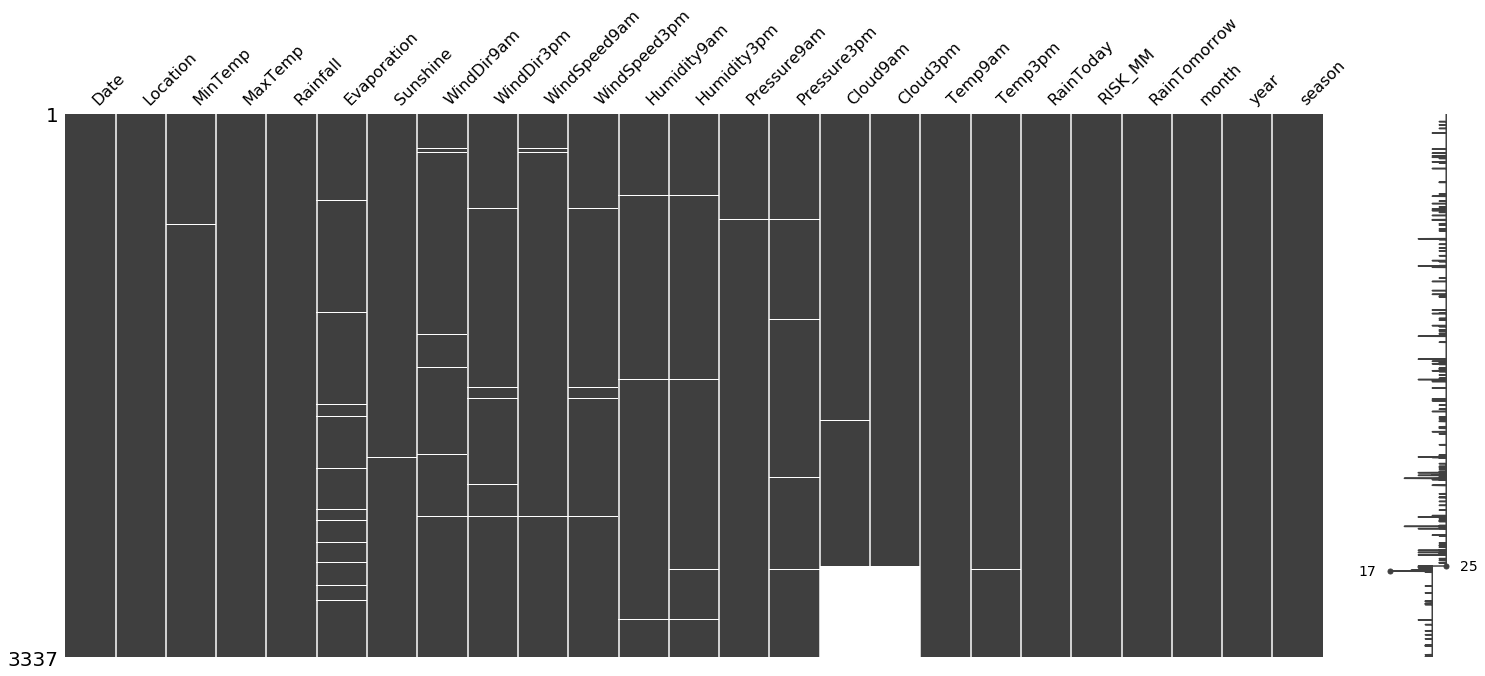

In [7]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["Cloud3pm","Cloud9am",]))

In [8]:
df.Cloud9am.isnull().sum() / len(df) # Percentage of null values

0.16961342523224454

We could find most attributes have missing data randomly. <br /> Maybe it is caused by machine damage. But the specific reasons are not clear. These missing values are not mistakes.<br />For 'Cloud9am' and 'Cloud3pm', the missing data concentrate in a certain period from 12/2010-06/2012. But their maximal null value percentage is not over 20%, and we think these attributes are important. So, we decided to impute the data.

In [9]:
df = df.fillna(df.mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 25 columns):
Date            3337 non-null datetime64[ns]
Location        3337 non-null object
MinTemp         3337 non-null float64
MaxTemp         3337 non-null float64
Rainfall        3337 non-null float64
Evaporation     3337 non-null float64
Sunshine        3337 non-null float64
WindDir9am      3281 non-null object
WindDir3pm      3304 non-null object
WindSpeed9am    3337 non-null float64
WindSpeed3pm    3337 non-null float64
Humidity9am     3337 non-null float64
Humidity3pm     3337 non-null float64
Pressure9am     3337 non-null float64
Pressure3pm     3337 non-null float64
Cloud9am        3337 non-null float64
Cloud3pm        3337 non-null float64
Temp9am         3337 non-null float64
Temp3pm         3337 non-null float64
RainToday       3331 non-null object
RISK_MM         3337 non-null float64
RainTomorrow    3337 non-null object
month           3337 non-null int64
year            333

We checked the imputed result.

In [11]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindDir9am      56
WindDir3pm      33
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        6
RISK_MM          0
RainTomorrow     0
month            0
year             0
season           0
dtype: int64

The amount of missing data is very small relatively to the size ofthe dataset, then leaving out the few samples with missingfeatures may be the best strategy. Also, imputing twice might cause louder noise. So, we decided to drop the rows which still have missing value.

In [12]:
df=df.dropna()
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindDir9am      0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
RainTomorrow    0
month           0
year            0
season          0
dtype: int64

Then we check whether there is duplicated data in dataset. And we found that there is no duplicated data. 

In [13]:
# check whether there is duplicated

b = df.duplicated()
len(df[b])

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 0 to 3336
Data columns (total 25 columns):
Date            3263 non-null datetime64[ns]
Location        3263 non-null object
MinTemp         3263 non-null float64
MaxTemp         3263 non-null float64
Rainfall        3263 non-null float64
Evaporation     3263 non-null float64
Sunshine        3263 non-null float64
WindDir9am      3263 non-null object
WindDir3pm      3263 non-null object
WindSpeed9am    3263 non-null float64
WindSpeed3pm    3263 non-null float64
Humidity9am     3263 non-null float64
Humidity3pm     3263 non-null float64
Pressure9am     3263 non-null float64
Pressure3pm     3263 non-null float64
Cloud9am        3263 non-null float64
Cloud3pm        3263 non-null float64
Temp9am         3263 non-null float64
Temp3pm         3263 non-null float64
RainToday       3263 non-null object
RISK_MM         3263 non-null float64
RainTomorrow    3263 non-null object
month           3263 non-null int64
year            326

## 3. Data Visualization

### 3.1 One feature
#### Rainday Distribution

We counted the number of days it rained and the number of days it didn't rain.

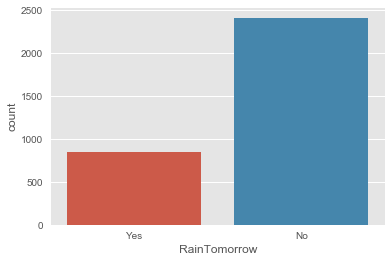

In [224]:
# plot the count of rainday or not
import seaborn as sns
sns.countplot(x = df['RainTomorrow'])

We could find that most records in this dataset did not rain. In other words, there are not many rainy days from February 2008 to June 2017.

#### Correlation of Attributions

In order to select attributes to visualize, we did the correlation figure.

In [21]:
#convert object type to numeric
df_numeric = df
df_numeric.loc[df_numeric.RainToday == 'Yes', 'RainToday'] = 1
df_numeric.loc[df_numeric.RainToday == 'No', 'RainToday'] = 0
df_numeric.loc[df_numeric.RainTomorrow == 'Yes', 'RainTomorrow'] = 1
df_numeric.loc[df_numeric.RainTomorrow == 'No', 'RainTomorrow'] = 0
df_numeric.RainToday = df_numeric.RainToday.convert_objects(convert_numeric=True)
df_numeric.dtypes

/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


Date            datetime64[ns]
Location                object
MinTemp                float64
MaxTemp                float64
Rainfall               float64
Evaporation            float64
Sunshine               float64
WindDir9am              object
WindDir3pm              object
WindSpeed9am           float64
WindSpeed3pm           float64
Humidity9am            float64
Humidity3pm            float64
Pressure9am            float64
Pressure3pm            float64
Cloud9am               float64
Cloud3pm               float64
Temp9am                float64
Temp3pm                float64
RainToday                int64
RISK_MM                float64
RainTomorrow             int64
month                    int64
year                     int64
season                  object
dtype: object

We convert the type of'RainToday' and 'RainTomorrow' to numeric, which is convenient for later calculations like correlation anaysis.

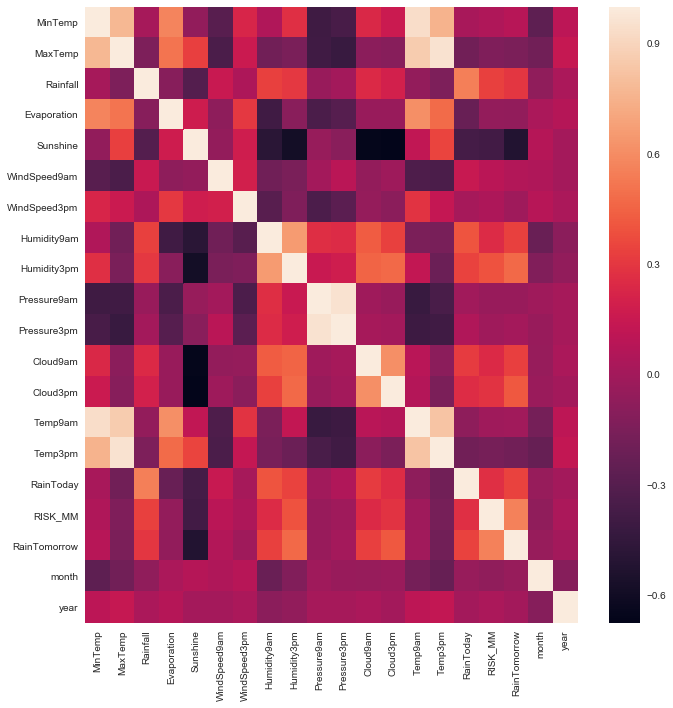

In [226]:
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap=cmap, annot=False)

f.tight_layout()

From this figure, we could find 'Humidity3pm' and 'Cloud3pm' are highly related to the 'RainTomorrow'. So, we think they are important.

#### Humidity Distribution at 3pm

We subset the whole data into four groups, which made the figure more readable. Then, plot the attributes.

In [227]:
df_grouped = pd.cut(df['Humidity3pm'],[0,25,50,75,1e6],
                                 labels=['Humidity0-25','Humidity25-50','Humidity50-75','Humidity75-100']) # this creates a new variable
df_grouped.describe()

count              3263
unique                4
top       Humidity50-75
freq               1752
Name: Humidity3pm, dtype: object

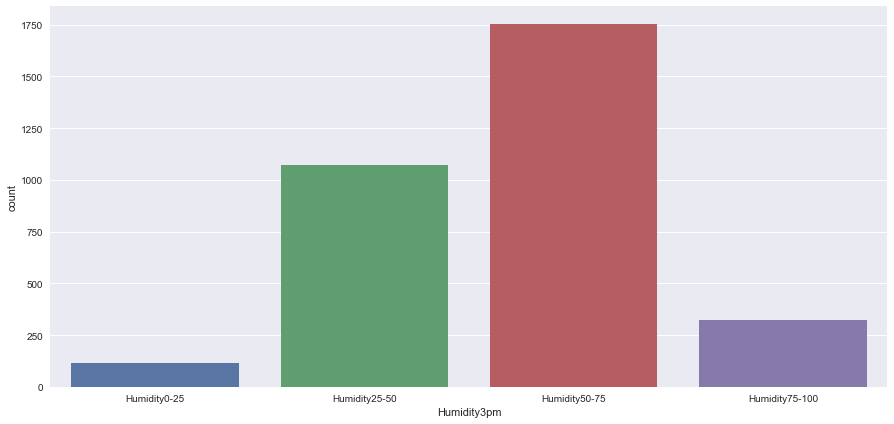

In [228]:
plt.figure(figsize=(15,7))
sns.countplot(x = df_grouped)

The number represents the percentage of air humidity. For example, 25 means that the air humidity at 3pm of that day is 25%. Therefore, the higher the number, the higher the air humidity.<br />
During this decade, Sydney's air humidity percentage was mostly concentrated at 50-75, followed by 25-50. Some weather conditions have reached 75 or more, but the number of dry weather below 25 is relatively small.

#### Cloud Distribution at 3pm

We plot the histogram and kernel density estimation (KDE) of 'Cloud3pm', and combined them together.

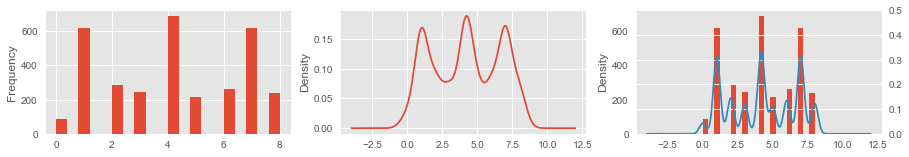

In [229]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(2,3,4)
df.Cloud3pm.plot.hist(bins=20)

plt.subplot(2,3,5)
df.Cloud3pm.plot.kde(bw_method=0.2)

plt.subplot(2,3,6)
df.Cloud3pm.plot.hist(bins=20)
df.Cloud3pm.plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim([0, 0.5])

plt.show()

The value of 'Cloud3pm' represents the fraction of sky obscured by cloud at 3 pm. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.<br />
According to the plot, we could find there are three picks, which is 1, 4 and 7. This means that the distribution of cloud conditions in Sydney was relatively average, and the frequency of each weather appeared on average. It was not always a long cloudy and sunny state. 

#### Rainfall Distribution

We plot the 'Rainfall', which is the amount of rainfall recorded for the day in mm.<br />
First, we subset the ‘Rainfall' into five groups, which made the figure more readable.

In [231]:
df_Rainfall = pd.cut(df['Rainfall'],[0,25,50,75,100,1e6],
                                 labels=['Rainfall0-25','Rainfall25-50','Rainfall50-75','Rainfall75-100','Rainfall100-120']) # this creates a new variable
df_Rainfall.describe()


count             1285
unique               5
top       Rainfall0-25
freq              1163
Name: Rainfall, dtype: object

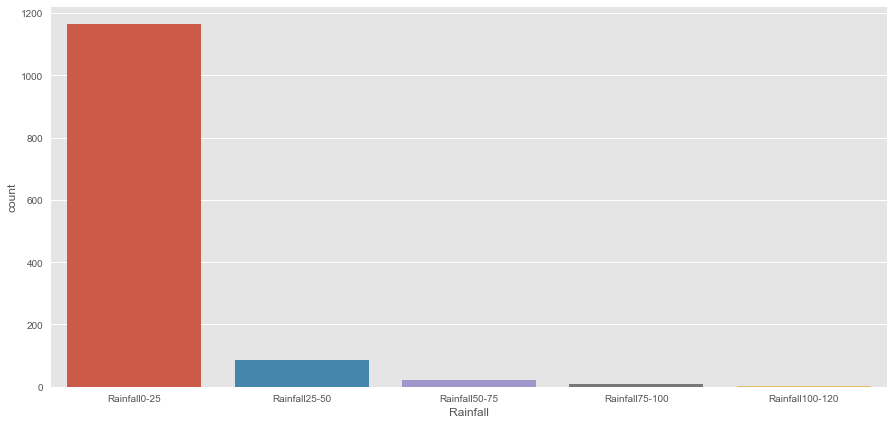

In [232]:
plt.figure(figsize=(15,7))
sns.countplot(x = df_Rainfall)

In this figure, most record concentrated in the first group, which is 0-25mm. And the amount of records in Rainfall 0-25 is significantlly higher that other groups. This means that most of the rainy weather in Sydney are light rain, with daily rainfall below 25 mm.<br />
There are only 3 records during 'Rainfall100-120'. We searched online and find there is rarely heavy rain in Syndey.

#### Wind Direction Distribution at 9am

Sydney is a coastal city, so we suspect that changes in wind direction may increase the likelihood of rain. In the data set, the wind direction is divided into sixteen directions and could be analyzed as categorical variables.

In [235]:
df_wind9am = df.groupby(by='WindDir9am')

In [237]:
for val,dir in df_wind9am:
    print('There were',len(dir),'days which the wind direction is',val)

There were 140 days which the wind direction is E
There were 78 days which the wind direction is ENE
There were 135 days which the wind direction is ESE
There were 100 days which the wind direction is N
There were 83 days which the wind direction is NE
There were 92 days which the wind direction is NNE
There were 103 days which the wind direction is NNW
There were 84 days which the wind direction is NW
There were 159 days which the wind direction is S
There were 102 days which the wind direction is SE
There were 125 days which the wind direction is SSE
There were 189 days which the wind direction is SSW
There were 57 days which the wind direction is SW
There were 1223 days which the wind direction is W
There were 493 days which the wind direction is WNW
There were 100 days which the wind direction is WSW


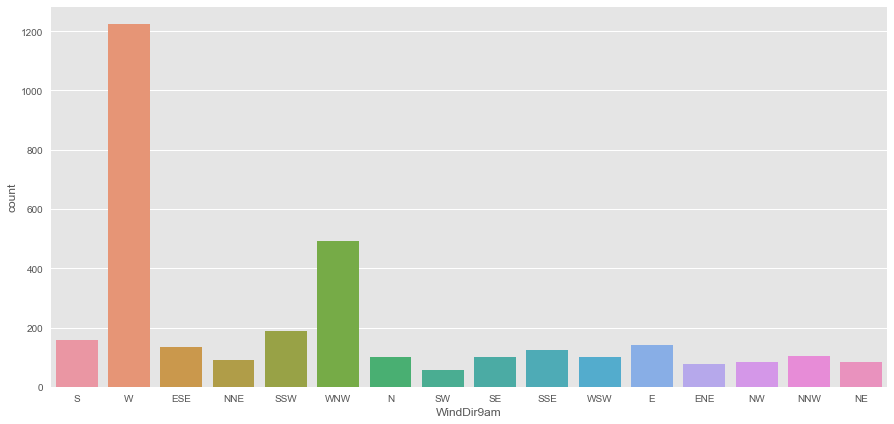

In [239]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['WindDir9am'])

We could have a overview of the distribution the wind directions. Wast wind occupied the most percentage at 9am.

### 3.2 Two features
#### Rain and Humility3pm

We plot the 'humility3pm' and add the 'RainTomorrow' as color factor.

In [246]:
df_grouped = pd.cut(df['Humidity3pm'],[0,25,50,75,1e6],
                                 labels=['Humidity0-25','Humidity25-50','Humidity50-75','Humidity75-100']) # this creates a new variable
Humidity3pm = pd.crosstab([df_grouped],
                         df.RainTomorrow.astype(bool)) # how to group # categories to cross tabulate 
print(Humidity3pm)

RainTomorrow    False  True 
Humidity3pm                 
Humidity75-100    110      6
Humidity50-75     971    101
Humidity25-50    1293    459
Humidity0-25       41    282


<Figure size 1080x504 with 0 Axes>

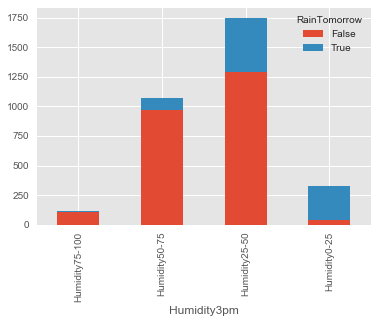

In [247]:
plt.figure(figsize=(15,7))
Humidity3pm.plot(kind='bar', stacked=True)
plt.show()

In this plot, we could find When the air humidity is 50-75, the amount of rain is the most in the next day. Along with the increase of humility, the percentage of 'True' increases, which means higher the humility, more likelihood of rain tommorrow.

#### Raintoday and Raintomorrow

We tried to find the relationship of 'RainToday' and 'RainTomorrow'.

RainTomorrow  False  True 
RainToday                 
0              2000    413
1               415    435


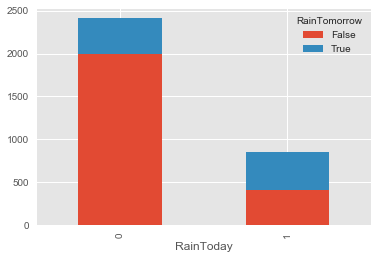

<Figure size 1080x504 with 0 Axes>

In [248]:
RainToday = pd.crosstab([df['RainToday']], # categories to cross tabulate
                       df.RainTomorrow.astype(bool)) # how to group
print(RainToday)
RainToday.plot(kind='bar', stacked=True)
plt.figure(figsize=(15,7))
plt.show()

We could find the percentage of 'True' is much higher in 'RainToday' is 1. In other words, if it rains today, the possibility of rain tomorrow is greater, compared with today's sunny day.

#### Rain and Could3pm

We plot the 'Cloud3pm' and add the 'RainTomorrow' as color to find the relationship.

RainTomorrow  False  True 
Cloud3pm                  
0.00000          84      0
1.00000         588     33
2.00000         269     16
3.00000         214     28
4.00000         105     29
4.21866         392    163
5.00000         167     49
6.00000         181     84
7.00000         339    281
8.00000          76    165


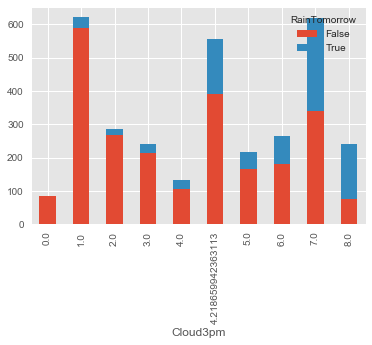

In [249]:
cloud3pm = pd.crosstab([df['Cloud3pm']], # categories to cross tabulate
                       df.RainTomorrow.astype(bool)) # how to group
print(cloud3pm)
cloud3pm.plot(kind='bar', stacked=True)

plt.show()# code from Dr.Larson's class slices

The likelihood of rain tomorrow incrases along with the increase of cloud, which means more cloud concentrate at 3pm that day, it more likely rains the next day.

#### Rain and Month

In [250]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

To discover the pattern in dataset. We draw a diagram about raining days and not raining days for each month during 2008-2017. Due to the lack of some month's data, the total month date will be different, but it could also find some pattern from the graph.

RainToday  False  True 
month                  
1            212     61
2            167     84
3            213     90
4            175     92
5            246     57
6            190    101
7            204     71
8            225     50
9            210     49
10           205     63
11           179     72
12           187     60


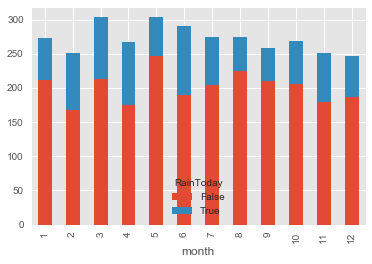

In [251]:
# graph of every month raining day and not raining day
raining = pd.crosstab([df['month']], # categories to cross tabulate
                       df.RainToday.astype(bool)) # how to group
print(raining)
raining.plot(kind='bar', stacked=True)
plt.show()

We plot the percentage of rain day in every month because of the lack of serveral months' data.

month
1     0.223443
2     0.334661
3     0.297030
4     0.344569
5     0.188119
6     0.347079
7     0.258182
8     0.181818
9     0.189189
10    0.235075
11    0.286853
12    0.242915
dtype: float64


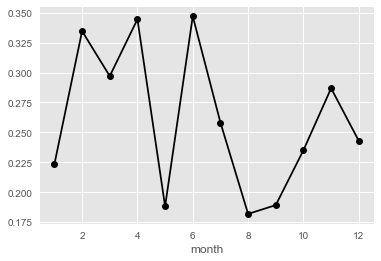

In [252]:
count_df = df.groupby('month')["RainToday"].count()
rainpercent = raining[True]/count_df
print(rainpercent) # the percentage of raining days every month
rainpercent.plot(kind='line',label='Raining percentage of each month',style='ko-')
plt.show()

We also calculate percentage of raining days each month and draw it into line chart.  
The diagrams above show that during first half year, the raining days are more than second half year. So in Sydney, the weather may be more wet in first half year than in second half year.  
Also the rain is more rich in Feb, Apr and June. In May, Aug and Sep, Sydney has less rain.

#### Rain and Year

Then we draw a diagram grouped by year. So we could find during 2008-2017, which year is a rich rain year.

RainToday  False  True 
year                   
2008         232     94
2009         266     79
2010         246     92
2011         243     91
2012         247     86
2013         255     72
2014         262     95
2015         267     96
2016         277     87
2017         118     58


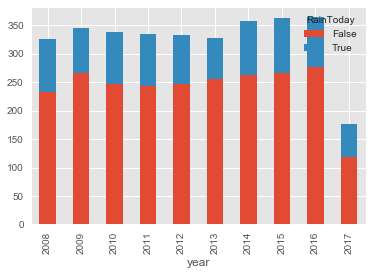

In [253]:
# graph of every year raining day and not raining day
raining = pd.crosstab([df['year']], # categories to cross tabulate
                       df.RainToday.astype(bool)) # how to group
print(raining)
raining.plot(kind='bar', stacked=True)
plt.show()

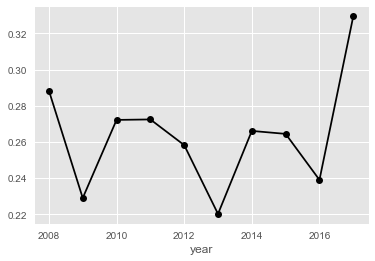

In [254]:
count_df = df.groupby('year')["RainToday"].count()
rainpercent = raining[True]/count_df  # calculate the percentage of raining days every month
rainpercent.plot(kind='line',label='Raining percentage of each year',style='ko-')
plt.show()

Although the curve in the figure is fluctuating, the raining days percentage is almost around 22%-29%. (Due to the data of 2017 lacks, We decided not to count 2017's data in this situation)  
In summary, the climate in Sydney is stable and regular.

#### Rain Changed by Year and Month

We do Group Count Plot according to the subgroups- year, month and raining days- on the dataset.

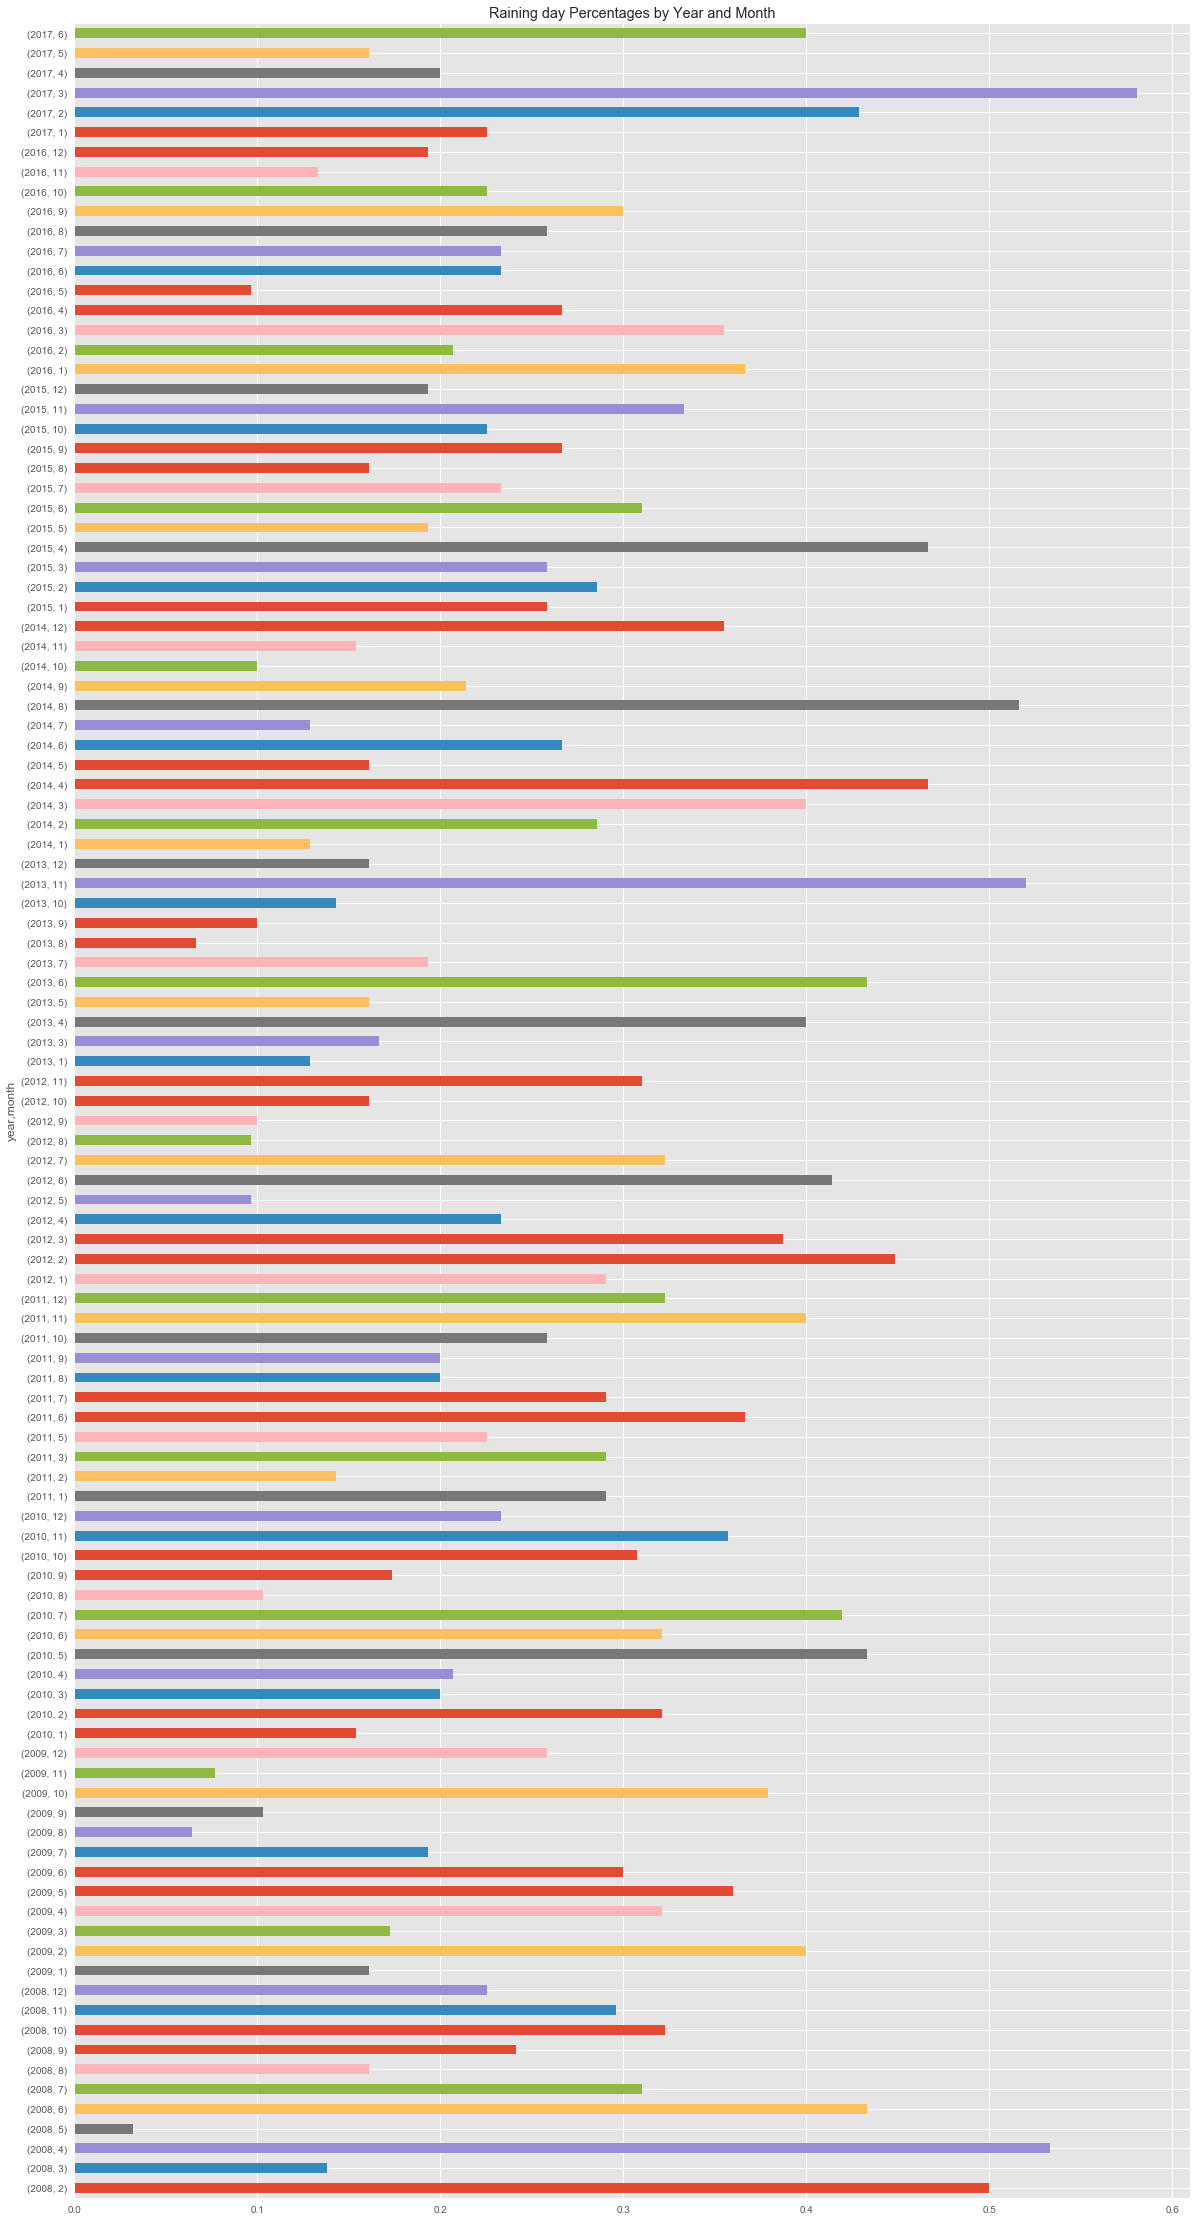

In [255]:
plt.figure(figsize=(20,40))
# first group the data
df_grouped = df.groupby(by=['year','month'])

# tabulate survival rates of each group
raining_rate = df_grouped.RainToday.sum() / df_grouped.RainToday.count()

# show in a bar chart using builtin pandas API
ax = raining_rate.plot(kind='barh')
plt.title('Raining day Percentages by Year and Month')
plt.show()

You could easily find in which year and which month, the raining day percentage is high. 

#### Rain and Wind Direction

The following part is the wind direction data virtualization. We grouped data by wind direction of 9am and 3pm, then turn it into histogram. The line chart is the raining days percentage grouped by wind direction.

In [256]:
# graph of every wind direction raining day and not raining day--9am
raining = pd.crosstab([df['WindDir9am']], # categories to cross tabulate
                       df.RainToday.astype(bool)) # how to group
print(raining)

RainToday   False  True 
WindDir9am              
E             115     25
ENE            59     19
ESE            93     42
N              83     17
NE             68     15
NNE            76     16
NNW            86     17
NW             69     15
S              87     72
SE             47     55
SSE            69     56
SSW            99     90
SW             29     28
W             965    258
WNW           395     98
WSW            73     27


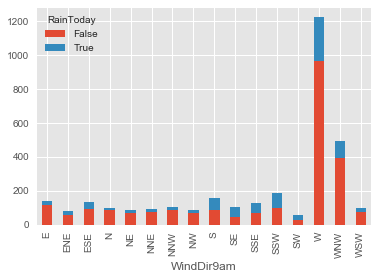

In [257]:
raining.plot(kind='bar', stacked=True)
plt.show()

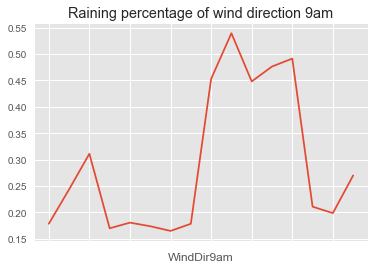

In [258]:
count_df = df.groupby('WindDir9am')["RainToday"].count()
rainpercent = raining[True]/count_df  # calculate the percentage of raining days every month
rainpercent.plot(kind='line',title='Raining percentage of wind direction 9am')
plt.show()

In [259]:
# graph of every wind direction raining day and not raining day--3pm
raining = pd.crosstab([df['WindDir3pm']], # categories to cross tabulate
                       df.RainToday.astype(bool)) # how to group
print(raining)

RainToday   False  True 
WindDir3pm              
E             464    129
ENE           307     47
ESE           232    102
N              47      9
NE            293     41
NNE            46     16
NNW            34      5
NW             48     10
S             143    106
SE            128     84
SSE           170    109
SSW            67     86
SW             25     16
W             154     45
WNW           165     21
WSW            90     24


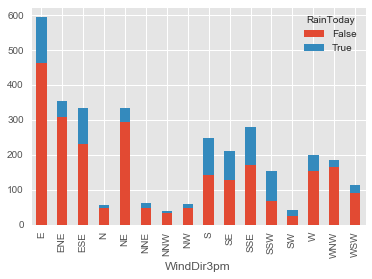

In [260]:
raining.plot(kind='bar', stacked=True)
plt.show()

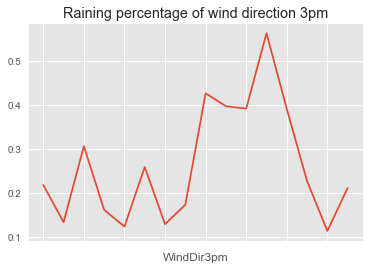

In [261]:
count_df = df.groupby('WindDir3pm')["RainToday"].count()
rainpercent = raining[True]/count_df  # calculate the percentage of raining days every month
rainpercent.plot(kind='line',title='Raining percentage of wind direction 3pm')
plt.show()

Most days, the wind direction is west at 9am and east at 3pm.  
At 9am, raining happens more on south and southwest direction of wind. At 3am, raining happens frequently on south and southwest to the south.

### 3.3 Three features
#### Rain and Cloud and Humility

We could learn from the correlation that cloud and humidity is highly related to the rain. So, we plot the violin to find the relationships.

In [262]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

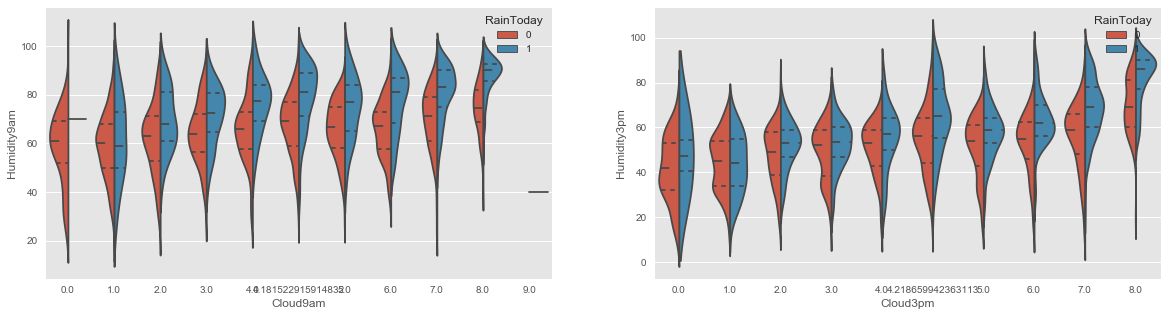

In [263]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.violinplot(x="Cloud9am", y="Humidity9am", hue="RainToday", data=df, 
               split='True',inner="quart",scale='area')

plt.subplot(1,2,2)
sns.violinplot(x="Cloud3pm", y="Humidity3pm", hue="RainToday", data=df, 
               split='True', inner="quart",scale='area')

plt.show()

Then we plot the boxplot.

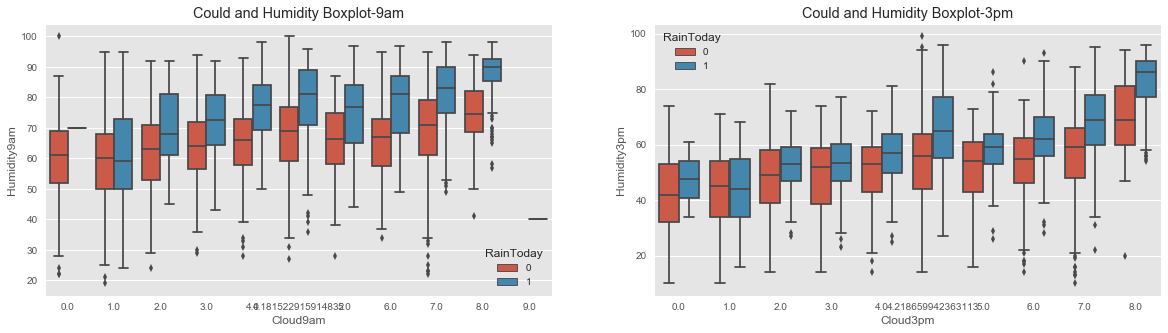

In [264]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(x="Cloud9am", y="Humidity9am", hue="RainToday", data=df)
plt.title('Could and Humidity Boxplot-9am')

plt.subplot(1,2,2)
sns.boxplot(x="Cloud3pm", y="Humidity3pm", hue="RainToday", data=df)
plt.title('Could and Humidity Boxplot-3pm')

plt.show()

We can get some conclusions as below:<br />
Whatever the humidity, if there is no cloud at 9am, Sydney will not rain. But in 3pm, even if the sky is clear, it will rain.
During the whole day, high humidity and the overcast of the sky, the frequency of rain has greatly increased.

## 4.  T-SNE
### 4.1 Dimensionality Reduction method, SNE.
So before we talk about t-SNE, we should know what is SNE at first. SNE is a dimensionality reduction method. 
<br />
#### SNE maps data points to the probability distribution through affinitie transformation, which mainly includes two steps: 
1.SNE constructs a probability distribution among high-dimensional objects, so that similar objects have a higher probability to be selected, while non-similar objects have a lower probability to be selected. <br />
2.SNE constructs the probability distribution of these points in the low dimensional space, making the probability distributions as similar as possible. <br /> 
#### In summary, we use SNE to reduce dimension by observing the similarity amoung data. 
Furthermore, we use Euclidean distance to be converted into conditional probability to express the similarity between points. After that, we can observe local features. If the dimensionality reduction is good and the local features remain intact, then, we optimized the distance, Kullback-Leibler divergences between the two distributions. However, the KL divergences is asymmetry, therefore, multiple initializations may be required to prevent getting into a local suboptimal solution. 
### 4.2 t-distributed Stochastic Neighbor Embedding(t-SNE)
Although SNE provides good visualization, it is difficult to optimize, and existing the crowding problem. However, Hinton et al. proposed the t-SNE method. <br />
#### Different from SNE, they are mainly as follows:
1.Using the symmetric version of SNE, the gradient formula is simplified. <br />
2.In low dimensional space, t distribution is used instead of gaussian distribution to express the similarity between two points. That reduces the crowding problem. <br />
#### It has two advantages:
1.For dissimilar points, a smaller distance creates a larger gradient to keep the points apart. <br />
2.This repulsion will not be infinite (the denominator in the gradient), avoid not similar points too far away.
#### However, it also has some problems: 
1.It is computationally complex and can take hours across millions of sample datasets, while PCA can be done in seconds or minutes. <br />
2.The Barnes-Hut t-SNE method (discussed below) is limited to two - or three-dimensional embedding.<br />
3.The algorithm is random, and multiple experiments with different seeds can produce different results. <br />
4.Global structure not explicitly reserved.<br />
So we should optimize t-SNE by using five pamameters, perplexity early exaggeration factor learning rate maximum number of iterations and angle. <br />
#### And know we use our dataset to reduce dimentionality among serveral features.
MinTemp, Rainfall, MaxTemp, WindSpeed3pm, Humiidity3pm, Temp3pm and Cloud3pm <br />
After we analysis data visualization, we think the seven features will affect the prediction of rain tomorrow efficiently. 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3263 samples in 0.010s...
[t-SNE] Computed neighbors for 3263 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3263
[t-SNE] Computed conditional probabilities for sample 2000 / 3263
[t-SNE] Computed conditional probabilities for sample 3000 / 3263
[t-SNE] Computed conditional probabilities for sample 3263 / 3263
[t-SNE] Mean sigma: 2.999286
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.957436
[t-SNE] Error after 1000 iterations: 1.223153


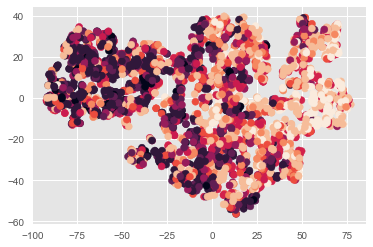

In [265]:
df1 = df [['MinTemp','Rainfall','MaxTemp' ,'WindSpeed3pm','Humidity3pm','Temp3pm','Cloud3pm']]
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.manifold import TSNE
X = df1 #X is the dataset we selected 
# Using T-SNE to reduce dimension. 
X_tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,verbose = 1)
Y = X_tsne.fit_transform(X)
# Show the t-SNE plot by using scatter function. 
plt.figure()
plt.scatter(Y[:,0],Y[:,1],c = X['Cloud3pm'])
plt.show()

The picture is not clearly and abnormal, I think the reason is that the data has not been done feature scaling. So we should do the standardization for scaling and adjust some parameters. The 'verbose' will show the details processing, 'n_components' means reduce orignal dimention to two dimentions. 'early_exaggeration' can controls how tight the natural clusters in the original space are in the embedded space and the space between them. Also, 'perplexity' is the scale that the number of neighbor perplexity. So after we change the parameters value, we can get the new T-SNE plot.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3263 samples in 0.005s...
[t-SNE] Computed neighbors for 3263 samples in 0.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3263
[t-SNE] Computed conditional probabilities for sample 2000 / 3263
[t-SNE] Computed conditional probabilities for sample 3000 / 3263
[t-SNE] Computed conditional probabilities for sample 3263 / 3263
[t-SNE] Mean sigma: 0.549869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 403.306732
[t-SNE] Error after 1000 iterations: 1.384256


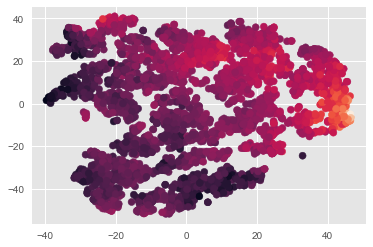

In [266]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

T_tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,early_exaggeration = 50,verbose = 1, perplexity = 50)
Y = T_tsne.fit_transform(X)
plt.figure()
plt.scatter(Y[:,0],Y[:,1],c=X[:,5] ,label="t-SNE")
plt.show()

I think that is better than before, however, it still has some problems. The reason we think is that the similarity between different features is closed, so that the clusters cannot divide clearly and obvious.  

## Reference:
1. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
2. https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

## Exceptional Work
### Kernel density estimation
It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot()  
https://seaborn.pydata.org/tutorial/distributions.html
#### Pressure3pm and WindSpeed3pm

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

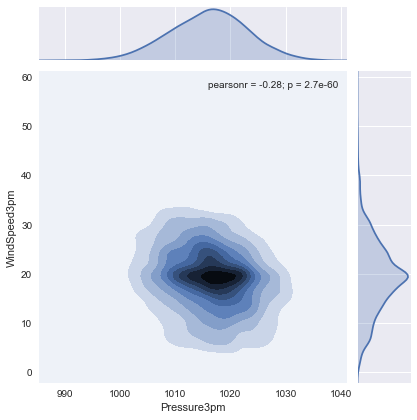

In [45]:
sns.jointplot(x="Pressure3pm", y="WindSpeed3pm", data=df, kind="kde")

It shows that more data concentrating in dark areas. In the future prediction process, if the value of the data is close to the value of the dark area data, it means that we can have more similar data, and get a more accurate estimate.
#### Cloud3pm and WindSpeed3pm

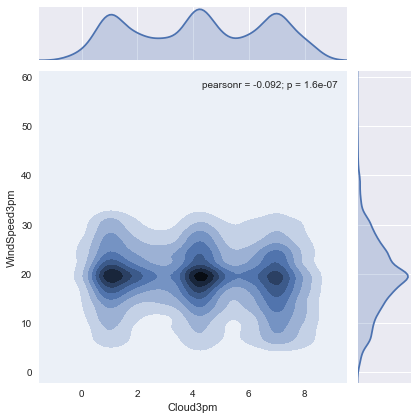

In [26]:
sns.jointplot(x="Cloud3pm", y="WindSpeed3pm", data=df, kind="kde")

### 3D plot

#### Scatter Plot
The mplot3D toolkit of Matplotlib allows to easily create 3D scatterplots. Note that most of the customisations presented in the Scatterplot section will work in 3D as well. The result can be a bit disappointing since each marker is represented as a dot, not as a sphere.
#### Surface Plot

3D plots are awesome to make surface plots. In a surface plot, each point is defined by 3 points: its latitude, its longitude, and its altitude (X, Y and Z). Thus, 2 types of input are possible. i/ A rectangular matrix where each cell represents the altitude. ii/ A long format matrix with 3 columns where each row is a point.  

https://python-graph-gallery.com/371-surface-plot/   
https://python-graph-gallery.com/370-3d-scatterplot/

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

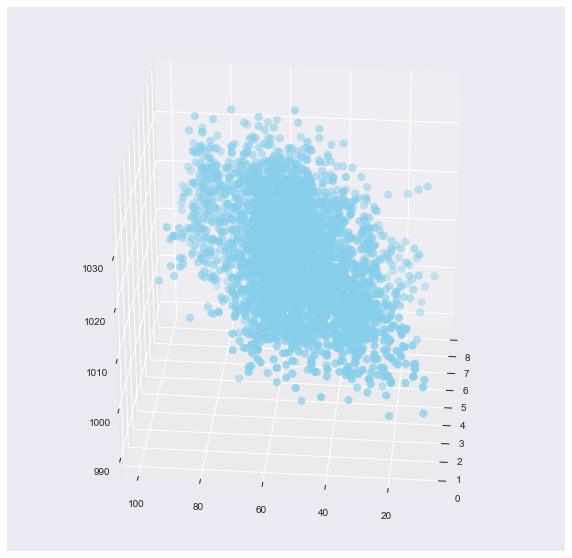

In [52]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Cloud3pm'], df['Humidity3pm'], df['Pressure3pm'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()

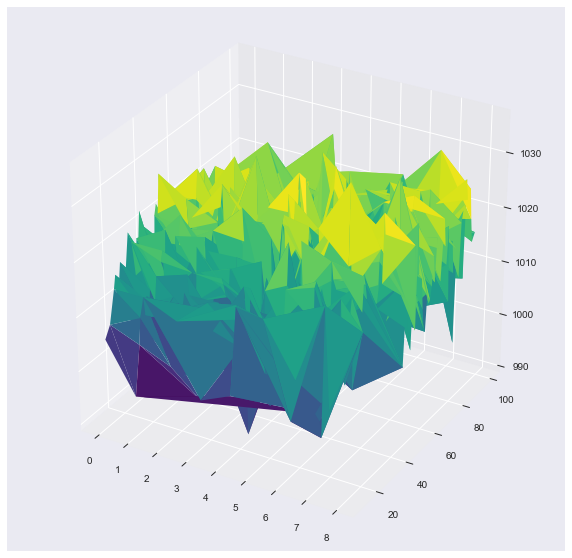

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Cloud3pm'], df['Humidity3pm'], df['Pressure3pm'], cmap=plt.cm.viridis, linewidth=0.2)

We draw scatter plot on features of Cloud3pm, Humidity3pm and Pressure3pm. Due to too many data, the 3D scatter plot doesn't work well. So we use surface plot to further display data. It shows that more data concentrating on dark area, which means Cloud between 0-6, Humidity between 0-40 and Pressure around 1000.  
This conclusion may be not accurate, but this is what we could find in this figure.